<a href="https://colab.research.google.com/github/paulinelafargue/Projet_Info_Durand_Lafargue/blob/main/Projet_Info_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math
import statistics as sts
import sys

data = pd.read_csv('post-32566-EIVP_KM.csv', delimiter = ';')
data['date'] = data.sent_at.str.split(' ', expand = True)[0]
data['time'] = data.sent_at.str.split(' ', expand = True)[1]
data['true_time'] = data.time.str.split('+', expand = True)[0]
data['time_zone'] = data.time.str.split('+', expand = True)[1]
data['sent_at'] = pd.to_datetime(data['sent_at'])
data['date'] = pd.to_datetime(data['date'])
data = data.drop(['Unnamed: 0','time'],axis=1)

def Choix_Date(date_debut, date_fin):
  df = data.sort_values(by = ['date','true_time'])
  df['indice'] = [x for x in range(len(df))]
  df = df.set_index('indice') 
  indice_debut = df[df['date'] == date_debut].index[0]
  indice_fin = df[df['date'] == date_fin].index[-1]
  return df[indice_debut:indice_fin] 

def graphique(donnee_voulue, date_debut, date_fin):
  df = Choix_Date(date_debut, date_fin)
  plt.plot(df['sent_at'].values, df[donnee_voulue].values, 'x')
  plt.xlabel('Temps')
  plt.ylabel(donnee_voulue)
  plt.title(donnee_voulue +' en fonction du temps')
  plt.gcf().set_size_inches([10,8])
  return plt.show()

## Fonctions Statistiques

def minimum(donnee_voulue, date_debut, date_fin):
  df = Choix_Date(date_debut, date_fin)
  mini = df[donnee_voulue].values[0]
  for elem in df[donnee_voulue].values :
    if elem < mini :
      mini = elem
  return mini

def maximum(donnee_voulue, date_debut, date_fin):
  df = Choix_Date(date_debut, date_fin)
  maxi = df[donnee_voulue].values[0]
  for elem in df[donnee_voulue].values :
    if elem > maxi :
      maxi = elem
  return maxi

def Fusion(L1, L2): 
  i1, i2 = 0,0 
  res = []
  while i1 < len(L1) and i2 < len(L2):
    if L1[i1] <= L2[i2]: 
      elem = L1[i1]
      i1 +=1
    else : 
      elem = L2[i2]
      i2 +=1
    res.append(elem)
  for elem in L1[i1:]:
    res.append(elem)
  for elem in L2[i2:]:
    res.append(elem)
  return res

def Tri_Fusion(L):
  if len(L) < 2:
    return L
  m = len(L)//2
  return Fusion(Tri_Fusion(L[:m], date_debut, date_fin),Tri_Fusion(L[m:], date_debut, date_fin))

def mediane(donnee_voulue, date_debut, date_fin):
  df = Choix_Date(donnee_voulue, date_debut, date_fin)
  L = Tri_Fusion(df[donnee_voulue].values)
  med = 0
  if len(L)%2 == 1 :
    milieu = len(L)//2
    med = L[milieu]
  else :
    var1 = len(L)//2
    var2 = len(L)//2 + 1
    med = 0.5*(L[var1]+L[var2])
  return med

def variance(variable, date_debut, date_fin):
  df = Choix_Date
  return 
  
def ecart_type(variable, date_debut, date_fin):
  return math.sqrt(variance(variable, date_debut, date_fin))

def moyenne(variable, date_debut, date_fin):
  df = Choix_Date(date_debut, date_fin)
  moy = 0
  if variable == 'lum' :
    somme = 0
    for elem in df[variable].values : 
      somme += 10**(elem/10)
    moy = 10*math.log(somme/len(df[variable].values))
  if variable == 'humidity':
    prod = 1
    for elem in df[variable].valeurs :
      prod *= elem
    moy = prod**(1/len(df[variable].values))
  else :
    somme = 0
    for elem in df[variable].values : 
      somme += elem
    moy = somme/len(df[variable].values) 
  return moy

def statistiques(variable, date_debut, date_fin):
  return 'Les valeurs statistiques entre les dates chosies pour la variable '+ variable + 'sont :/n Minimum = ' + str(minimum(variable, date_debut, date_fin)) + '/n Maximum : ' + str(maximum(variable, date_debut, date_fin)) + '/n Moyenne : ' + str(moyenne(variable, date_debut, date_fin)) + '/n Variance : ' + str(variance(variable, date_debut, date_fin)) +'/n Ecart-type : ' + str(ecart_type(variable, date_debut, date_fin))

## Coefficients de Correlation

def Coef_Correlation_Pearson(donnee1, donnee2):
  df = data.sort_values(by = ['date','true_time'])
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_xlabel('Temps')
  ax1.set_ylabel(donnee1, color=color)
  ax1.plot(df['sent_at'].values, df[donnee1].values, label = str(donnee1), color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.set_ylabel(donnee2, color=color)  # we already handled the x-label with ax1
  ax2.plot(df['sent_at'].values, df[donnee2].values, label = str(donnee2), color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  fig.tight_layout()
  plt.title(donnee1 + ' et ' + donnee2 + ' en fonction du temps.\n Coefficient de Corrélation de Pearson : ' + str(round(data[donnee1].corr(data[donnee2]),3)))
  plt.gcf().set_size_inches([10,8])
  plt.legend()
  return plt.show()

def Coef_Correlation_Spearman(donnee1, donnee2):
  df = data.sort_values(by = ['date','true_time'])
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_xlabel('Temps')
  ax1.set_ylabel(donnee1, color=color)
  ax1.plot(df['sent_at'].values, df[donnee1].values, label = str(donnee1), color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.set_ylabel(donnee2, color=color)  # we already handled the x-label with ax1
  ax2.plot(df['sent_at'].values, df[donnee2].values, label = str(donnee2), color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  fig.tight_layout()
  plt.title(donnee1 + ' et ' + donnee2 + ' en fonction du temps.\n Coefficient de Corrélation de Spearman : ' + str(round(data[donnee1].corr(data[donnee2], method = 'spearman'),3)))
  plt.gcf().set_size_inches([10,8])
  plt.legend()
  return plt.show()

def Coef_Correlation_Kendall(donnee1, donnee2):
  df = data.sort_values(by = ['date','true_time'])
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_xlabel('Temps')
  ax1.set_ylabel(donnee1, color=color)
  ax1.plot(df['sent_at'].values, df[donnee1].values, label = str(donnee1), color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.set_ylabel(donnee2, color=color)  # we already handled the x-label with ax1
  ax2.plot(df['sent_at'].values, df[donnee2].values, label = str(donnee2), color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  fig.tight_layout()
  plt.title(donnee1 + ' et ' + donnee2 + ' en fonction du temps.\n Coefficient de Corrélation de Kendall : ' + str(round(data[donnee1].corr(data[donnee2], method = 'kendall'),3)))
  plt.gcf().set_size_inches([10,8])
  plt.legend()
  return plt.show()

## Humidex

def Alpha(date_debut, date_fin):
  df = Choix_Date(date_debut, date_fin)
  T_Air = df['temp'].values
  humidite = df['humidite'].values
  alpha = []
  for i in range(len(T_Air)):
    alpha.append((17.27*T_Air[i])/(237.7*T_Air[i])+ math.log(humidite[i]))
  df['alpha'] = alpha
  return df

def Point_rosee(date_debut, date_fin):
  df = Alpha(date_debut, date_fin)
  alpha = df['alpha'].values
  T_Rosee = []
  for elem in alpha:
    T_Rosee.append((237.7*elem)/(17.27-elem))
  return T_Rosee

def humidex(date_debut, date_fin):
  df = Choix_Date(date_debut, date_fin)
  T_Air = df['temp'].values
  T_Rosee = Point_rosee(date_debut, date_fin)
  humidex = []
  for i in range(len(T_Air)) :
    humidex.append(T_Air[i] + 0.5555*((6.11*math.exp(5417.7530*((1/273.16)-(1/(273.15+T_Rosee[i])))))-10))
  df['humidex'] = humidex
  return df

def anomalies(variable, date_debut, date_fin):
  df = Choix_Date(date_debut, date_fin)
  donnees_ref = df[variable].values
  indices_anomalies = []
  mediane_loc = 0
  moyenne_loc = 0
  ecart_type_loc = 0
  ecart_type = donnees_ref.std() 
  for i in range(15, len(donnees_ref)-16):
      mediane_loc = sts.median(donnees_ref[i-15:i+16])
      ecart_type_loc = donnees_ref[i-15:i+16].std()
      if donnees_ref[i] > (mediane_loc + 0.5*float(ecart_type_loc)) or donnees_ref[i] < (mediane_loc - 0.5*float(ecart_type_loc)):
        indices_anomalies.append(i)
  df = df.iloc[indices_anomalies]
  plt.plot(df['sent_at'].values, df[variable].values, 'ro', label = 'Anomalies')
  plt.legend()
  graphique(variable, date_debut, date_fin)
  return plt.show()


## Tranfert en CLI

def main():
  if len(sys.argv) <= 2 :
    print('''Veuillez renseigner plus d'informations''')
  else :
    function = sys.argv[1]
    if function == 'Choix_Date':
      if len(sys.arg) != 4 :
        print('''Il faut renseigner une date de début et une date de fin au format 'YYYY-MM-DD'.''')
      else : 
        date_debut = str(sys.argv[2])
        date_fin = str(sys.argv[3])
        Choix_Date(date_debut, date_fin)
    if function == 'graphique':
      if len(sys.arg) != 5 :
        print('''Pour afficher le graphique d'une variable en fonction du temps, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        graphique(variable, date_debut, date_fin)
    if function == 'minimum':
      if len(sys.arg) != 5 :
        print('''Pour afficher le minimum d'une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        minimum(variable, date_debut, date_fin)
    if function == 'maximum':
      if len(sys.arg) != 5 :
        print('''Pour afficher le maximum d'une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        maximum(variable, date_debut, date_fin)
    if function == 'Fusion':
      if len(sys.arg) != 4 :
        print('''Il faut renseigner : deux listes''')
      else :
        L1 = str(sys.argv[2]) 
        L2 = str(sys.argv[3])
        Fusion(L1, L2)
    if function == 'Tri_Fusion':
      if len(sys.arg) != 5 :
        print('''Il faut renseigner : une variable (parmi 'lum', 'noise', 'temp', 'co2', 'humidity'), une date de début et une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        Tri_Fusion(variable, date_debut, date_fin)
    if function == 'mediane':
      if len(sys.arg) != 5 :
        print('''Pour afficher le médiane d'une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        mediane(variable, date_debut, date_fin)
    if function == 'ecart_type':
      if len(sys.arg) != 5 :
        print('''Pour afficher l'écart type des valeurs prises par une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        ecart_type(variable, date_debut, date_fin)
    if function == 'variance':
      if len(sys.arg) != 5 :
        print('''Pour afficher la variance des valeurs prises par une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        variance(variable, date_debut, date_fin)
    if function == 'moyenne':
      if len(sys.arg) != 5 :
        print('''Pour afficher la moyenne des valeurs prises par une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        moyenne(variable, date_debut, date_fin)
    if function == 'moyenne':
      if len(sys.arg) != 5 :
        print('''Pour afficher la moyenne des valeurs prises par une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        moyenne(variable, date_debut, date_fin)
    if function == 'statistiques':
      if len(sys.arg) != 5 :
        print('''Pour afficher les indicateurs statistiques des valeurs prises par une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        statistiques(variable, date_debut, date_fin)    
    if function == 'Coef_Correlation_Spearman':
      if len(sys.arg) != 4 :
        print('''Pour afficher la valeur du coefficient de corrélation de Spearman entre les deux variables des valeurs prises par une variable, il faut renseigner :\n - 2 variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'.''')
      else :
        donnee1 = str(sys.argv[2]) 
        donnee2 = str(sys.argv[3])
        Coef_Correlation_Spearman(donnee1, donnee2)
    if function == 'Coef_Correlation_Kendall':
      if len(sys.arg) != 4 :
        print('''Pour afficher la valeur du coefficient de corrélation de Kendall entre les deux variables des valeurs prises par une variable, il faut renseigner :\n - 2 variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'.''')
      else :
        donnee1 = str(sys.argv[2]) 
        donnee2 = str(sys.argv[3])
        Coef_Correlation_Kendall(donnee1, donnee2)
    if function == 'Alpha':
      if len(sys.arg) != 4 :
        print('''Il faut renseigner une date de début et une date de fin au format 'YYYY-MM-DD'.''')
      else : 
        date_debut = str(sys.argv[2])
        date_fin = str(sys.argv[3])
        Alpha(date_debut, date_fin)
    if function == 'Point_rosee':
      if len(sys.arg) != 4 :
        print('''Il faut renseigner une date de début et une date de fin au format 'YYYY-MM-DD'.''')
      else : 
        date_debut = str(sys.argv[2])
        date_fin = str(sys.argv[3])
        Point_Rosee(date_debut, date_fin)
    if function == 'humidex':
      if len(sys.arg) != 4 :
        print('''Il faut renseigner une date de début et une date de fin au format 'YYYY-MM-DD'.''')
      else : 
        date_debut = str(sys.argv[2])
        date_fin = str(sys.argv[3])
        humidex(date_debut, date_fin)
    if function == 'anomalies':
      if len(sys.arg) != 5 :
        print('''Pour afficher graphiquement les anomalies des relevés d'une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        anomalies(variable, date_debut, date_fin)

  
if (__name__ == 'main'):
  main()




In [ ]:
def main():
  if len(sys.argv) <= 2 :
    print('''Veuillez renseigner plus d'informations''')
  else :
    function = sys.argv[1]
    if function == 'Choix_Date':
      if len(sys.arg) != 4 :
        print('''Il faut renseigner une date de début et une date de fin au format 'YYYY-MM-DD'.''')
      else : 
        date_debut = str(sys.argv[2])
        date_fin = str(sys.argv[3])
        Choix_Date(date_debut, date_fin)
    if function == 'graphique':
      if len(sys.arg) != 5 :
        print('''Pour afficher le graphique d'une variable en fonction du temps, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        graphique(variable, date_debut, date_fin)
    if function == 'minimum':
      if len(sys.arg) != 5 :
        print('''Pour afficher le minimum d'une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        minimum(variable, date_debut, date_fin)
    if function == 'maximum':
      if len(sys.arg) != 5 :
        print('''Pour afficher le maximum d'une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        maximum(variable, date_debut, date_fin)
    if function == 'Fusion':
      if len(sys.arg) != 4 :
        print('''Il faut renseigner : deux listes''')
      else :
        L1 = str(sys.argv[2]) 
        L2 = str(sys.argv[3])
        Fusion(L1, L2)
    if function == 'Tri_Fusion':
      if len(sys.arg) != 5 :
        print('''Il faut renseigner : une variable (parmi 'lum', 'noise', 'temp', 'co2', 'humidity'), une date de début et une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        Tri_Fusion(variable, date_debut, date_fin)
    if function == 'mediane':
      if len(sys.arg) != 5 :
        print('''Pour afficher le médiane d'une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        mediane(variable, date_debut, date_fin)
    if function == 'ecart_type':
      if len(sys.arg) != 5 :
        print('''Pour afficher l'écart type des valeurs prises par une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        ecart_type(variable, date_debut, date_fin)
    if function == 'variance':
      if len(sys.arg) != 5 :
        print('''Pour afficher la variance des valeurs prises par une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        variance(variable, date_debut, date_fin)
    if function == 'moyenne':
      if len(sys.arg) != 5 :
        print('''Pour afficher la moyenne des valeurs prises par une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        moyenne(variable, date_debut, date_fin)
    if function == 'moyenne':
      if len(sys.arg) != 5 :
        print('''Pour afficher la moyenne des valeurs prises par une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        moyenne(variable, date_debut, date_fin)
    if function == 'Coef_Correlation_Spearman':
      if len(sys.arg) != 4 :
        print('''Pour afficher la valeur du coefficient de corrélation de Spearman entre les deux variables des valeurs prises par une variable, il faut renseigner :\n - 2 variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'.''')
      else :
        donnee1 = str(sys.argv[2]) 
        donnee2 = str(sys.argv[3])
        Coef_Correlation_Spearman(donnee1, donnee2)
    if function == 'Coef_Correlation_Kendall':
      if len(sys.arg) != 4 :
        print('''Pour afficher la valeur du coefficient de corrélation de Kendall entre les deux variables des valeurs prises par une variable, il faut renseigner :\n - 2 variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'.''')
      else :
        donnee1 = str(sys.argv[2]) 
        donnee2 = str(sys.argv[3])
        Coef_Correlation_Kendall(donnee1, donnee2)
    if function == 'Alpha':
      if len(sys.arg) != 4 :
        print('''Il faut renseigner une date de début et une date de fin au format 'YYYY-MM-DD'.''')
      else : 
        date_debut = str(sys.argv[2])
        date_fin = str(sys.argv[3])
        Alpha(date_debut, date_fin)
    if function == 'Point_rosee':
      if len(sys.arg) != 4 :
        print('''Il faut renseigner une date de début et une date de fin au format 'YYYY-MM-DD'.''')
      else : 
        date_debut = str(sys.argv[2])
        date_fin = str(sys.argv[3])
        Point_Rosee(date_debut, date_fin)
    if function == 'humidex':
      if len(sys.arg) != 4 :
        print('''Il faut renseigner une date de début et une date de fin au format 'YYYY-MM-DD'.''')
      else : 
        date_debut = str(sys.argv[2])
        date_fin = str(sys.argv[3])
        humidex(date_debut, date_fin)
    if function == 'anomalies':
      if len(sys.arg) != 5 :
        print('''Pour afficher graphiquement les anomalies des relevés d'une variable, il faut renseigner :\n - une variable parmi 'lum', 'noise', 'temp', 'co2', 'humidity'\n - une date de début au format 'YYYY-MM-DD'\n - une date de fin au format 'YYYY-MM-DD'.''')
      else :
        variable = str(sys.argv[2]) 
        date_debut = str(sys.argv[3])
        date_fin = str(sys.argv[4])
        anomalies(variable, date_debut, date_fin)

  
if (__name__ = 'main'):
  main()


# Commandes qui fonctionnent


In [ ]:
graphique('lum', '2019-08-11', '2019-08-13')
graphique('co2', '2019-08-11', '2019-08-13')
graphique('noise', '2019-08-11', '2019-08-13')



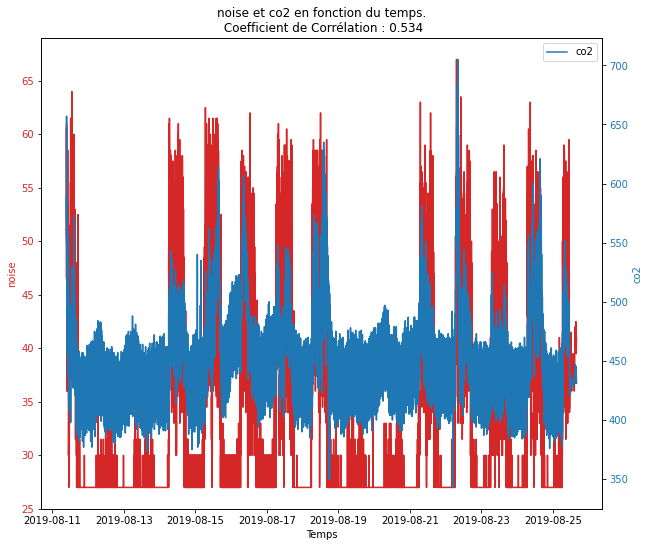

In [ ]:
Coef_Correlation_Pearson('noise', 'co2')

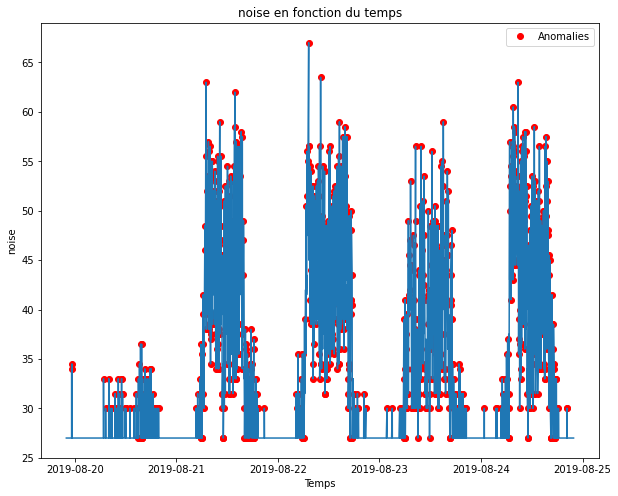

In [ ]:
Anomalies_amélioré('noise', '2019-08-20', '2019-08-24')

In [ ]:
def Anomalies_amélioré(variable, date_debut, date_fin):
  df = Choix_Date(date_debut, date_fin)
  donnees_ref = df[variable].values
  indices_anomalies = []
  mediane_loc = 0
  moyenne_loc = 0
  ecart_type_loc = 0
  ecart_type = donnees_ref.std() 
  for i in range(15, len(donnees_ref)-16):
      mediane_loc = sts.median(donnees_ref[i-15:i+16])
      ecart_type_loc = donnees_ref[i-15:i+16].std()
      if ecart_type_loc > ecart_type and (donnees_ref[i] > (mediane_loc + ecart_type) or donnees_ref[i] < (mediane_loc - ecart_type)):
        indices_anomalies.append(i)
      elif ecart_type_loc < ecart_type and (donnees_ref[i] > (mediane_loc + ecart_type_loc) or donnees_ref[i] < (mediane_loc - ecart_type_loc)):
        indices_anomalies.append(i)

In [ ]:
import pandas as pd

data = pd.read_csv('post-32566-EIVP_KM.csv', delimiter = ';')
data

,Unnamed: 0,id,noise,temp,humidity,lum,co2,sent_at
0,0,1,35.5,25.8,55.0,282,448,2019-08-11 17:48:06+02:00
1,1,1,44.5,25.5,55.0,288,429,2019-08-11 18:03:03+02:00
2,2,1,34.5,25.5,55.0,286,417,2019-08-11 18:18:03+02:00
3,3,1,37.5,25.5,54.5,282,433,2019-08-11 18:33:03+02:00
4,4,1,36.0,25.3,55.0,274,403,2019-08-11 18:48:03+02:00
...,...,...,...,...,...,...,...,...
7875,7875,6,41.0,21.3,44.5,728,479,2019-08-25 10:45:51+02:00
7876,7876,6,41.0,21.3,44.0,270,482,2019-08-25 11:00:52+02:00
7877,7877,6,42.0,21.3,44.0,302,475,2019-08-25 11:15:52+02:00
7878,7878,6,39.5,21.3,43.5,336,478,2019-08-25 11:30:54+02:00
